In [25]:
import pdb
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets, transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import tensorflow as tf

In [75]:
transform = transforms.Compose([transforms.Resize(28), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
ogdataset = datasets.MNIST(root = '/content/data', train=True, download=True, transform=transform)

In [41]:
digit = 5
dataset = [(img, label) for img, label in ogdataset if label == digit]
print(len(dataset))

5421


In [76]:
def show(tensor, ch=1, size=(28, 28), num=9):
    data = tensor.detach().cpu().view(-1, ch, *size)
    grid = make_grid(data[:num], nrow=3).permute(1, 2, 0)
    plt.imshow(grid)
    plt.show()

In [77]:
epoch = 80
cur_iter = 0
info_iter = 6
mean_gen_loss = 0
mean_disc_loss = 0

In [78]:
z_dim = 200
lr = 0.0001
loss = nn.BCEWithLogitsLoss()
batch_size = 1024
device = "cuda"
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [80]:
def genBlock(inp_nodes, out_nodes):
    return nn.Sequential(
        nn.Linear(inp_nodes, out_nodes),
        nn.BatchNorm1d(out_nodes),
        nn.ReLU()
    )

In [81]:
def gen_noise(batch_size, z_dim):
    return torch.randn(batch_size, z_dim).to(device)

In [82]:
class Generator(nn.Module):
    def __init__(self, z_dim=200, o_dim=784, h_dim=120):
        super().__init__()
        self.z_dim = z_dim
        self.o_dim = o_dim
        self.h_dim = h_dim
        self.gen = nn.Sequential(
            genBlock(z_dim, h_dim),
            genBlock(h_dim, h_dim * 2),
            genBlock(h_dim * 2, h_dim * 4),
            genBlock(h_dim * 4, h_dim * 8),
            genBlock(h_dim * 8, h_dim * 16),
            genBlock(h_dim * 16, o_dim),
            nn.Tanh(),
        )

    def forward(self, noise):
        return self.gen(noise)

In [83]:
def discBlock(inp_nodes, out_nodes):
    return nn.Sequential(
        nn.Linear(inp_nodes, out_nodes),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3)
    )

In [84]:
class Discriminator(nn.Module):
    def __init__(self, inp_dim=784, hidden_dim=100):
        super().__init__()
        self.inp_dim = inp_dim
        self.hidden_dim = hidden_dim
        self.disc = nn.Sequential(
            discBlock(inp_dim, hidden_dim * 4),
            discBlock(hidden_dim * 4, hidden_dim * 2),
            discBlock(hidden_dim * 2, hidden_dim),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    def forward(self, image):
        return self.disc(image)

In [85]:
gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001)

disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.0005)

In [86]:
def gen_loss(loss_func, gen, disc, batch_size, z_dim):
    noise = gen_noise(batch_size, z_dim)
    fake = gen(noise)
    pred = disc(fake)
    target = torch.ones_like(pred)
    return loss_func(pred, target)

In [87]:
def disc_loss(loss_func, gen, disc, batch_size, z_dim, real):
    noise = gen_noise(batch_size, z_dim)
    fake = gen(noise)
    disc_fake = disc(fake.detach())
    disc_fake_target = torch.zeros_like(disc_fake)
    disc_fake_loss = loss_func(disc_fake, disc_fake_target)

    disc_real = disc(real)
    disc_real_target = torch.ones_like(disc_real)
    disc_real_loss = loss_func(disc_real, disc_real_target)

    return (disc_fake_loss + disc_real_loss) / 2

starting epoch 0


  0%|          | 0/6 [00:00<?, ?it/s]

starting epoch 1


  0%|          | 0/6 [00:00<?, ?it/s]

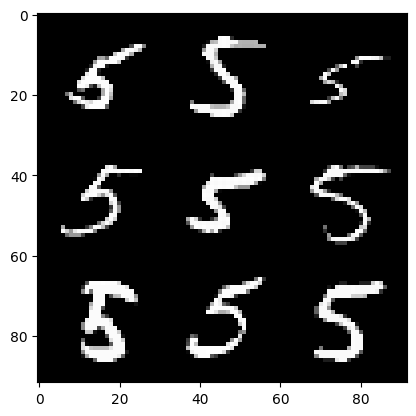

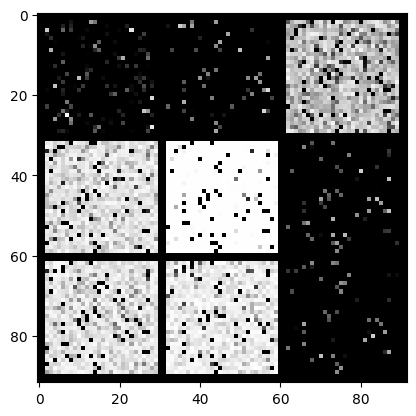

1 : step 6, Generator loss : 0.6113030860821407, Discriminator Loss : 0.7672912577788035
starting epoch 2


  0%|          | 0/6 [00:00<?, ?it/s]

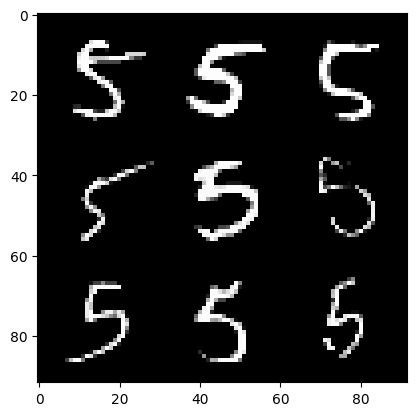

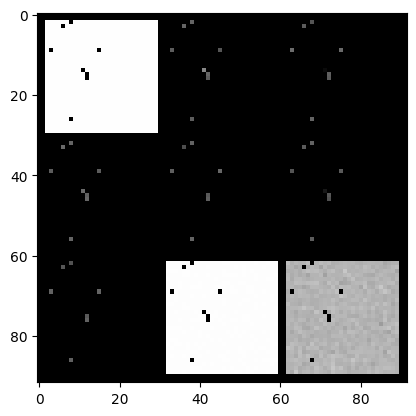

2 : step 12, Generator loss : 0.5295738379160563, Discriminator Loss : 0.6095176736513774
starting epoch 3


  0%|          | 0/6 [00:00<?, ?it/s]

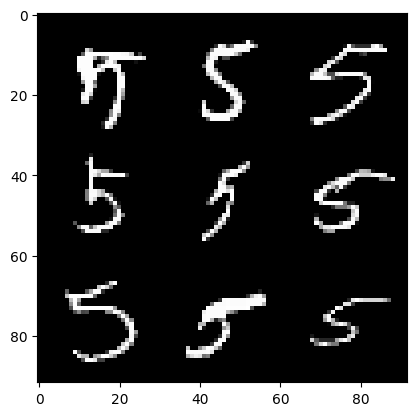

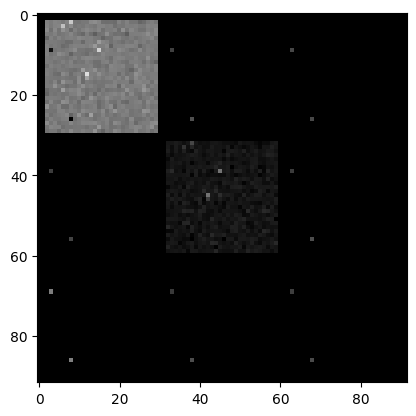

3 : step 18, Generator loss : 0.5250397026538849, Discriminator Loss : 0.6101470192273457
starting epoch 4


  0%|          | 0/6 [00:00<?, ?it/s]

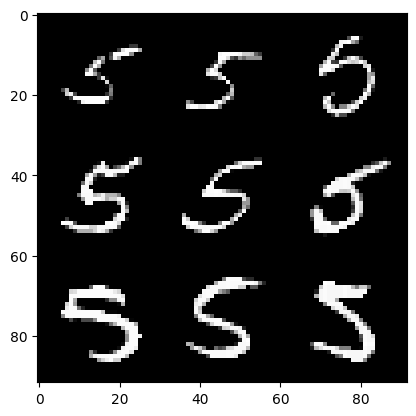

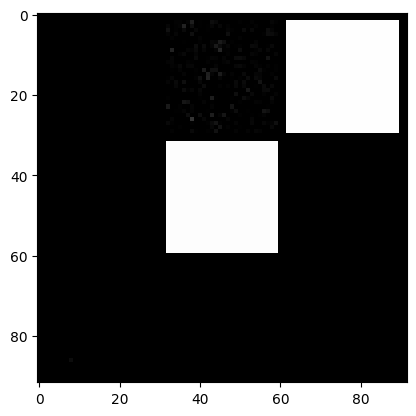

4 : step 24, Generator loss : 0.527277261018753, Discriminator Loss : 0.6072567204634348
starting epoch 5


  0%|          | 0/6 [00:00<?, ?it/s]

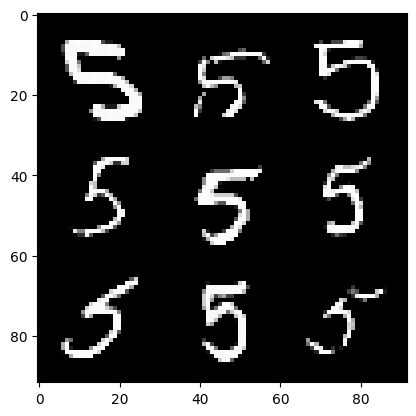

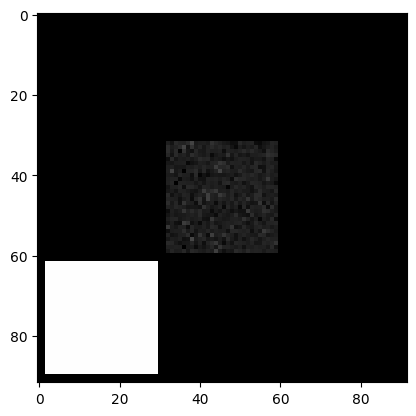

5 : step 30, Generator loss : 0.5343043406804403, Discriminator Loss : 0.6027282873789469
starting epoch 6


  0%|          | 0/6 [00:00<?, ?it/s]

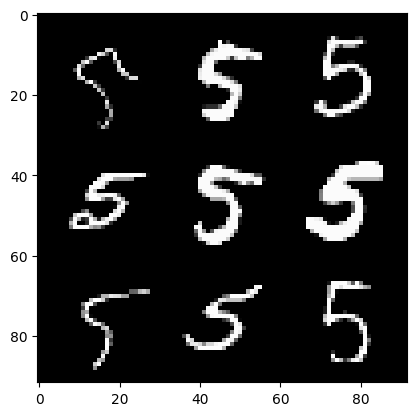

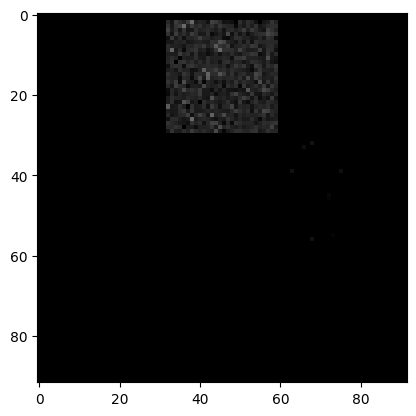

6 : step 36, Generator loss : 0.5490329662958782, Discriminator Loss : 0.5922152797381084
starting epoch 7


  0%|          | 0/6 [00:00<?, ?it/s]

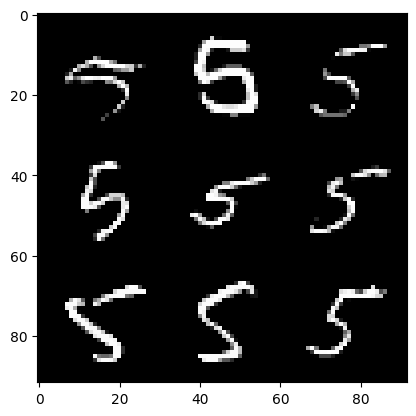

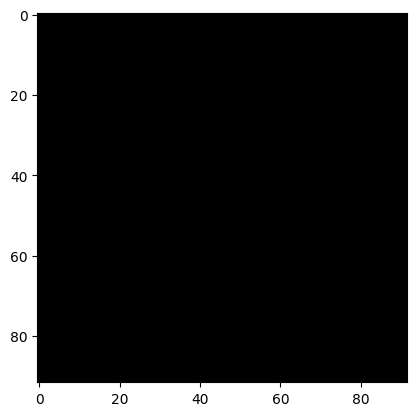

7 : step 42, Generator loss : 0.5730143487453461, Discriminator Loss : 0.575706293185552
starting epoch 8


  0%|          | 0/6 [00:00<?, ?it/s]

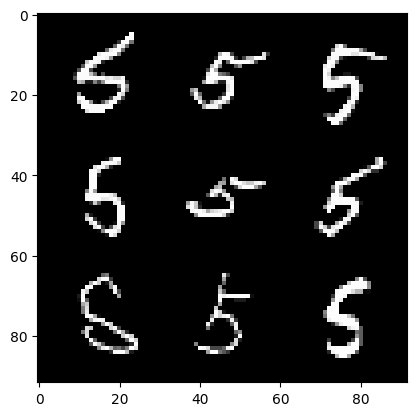

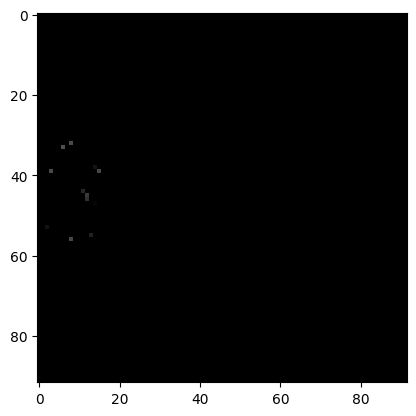

8 : step 48, Generator loss : 0.606408029794693, Discriminator Loss : 0.5550020138422648
starting epoch 9


  0%|          | 0/6 [00:00<?, ?it/s]

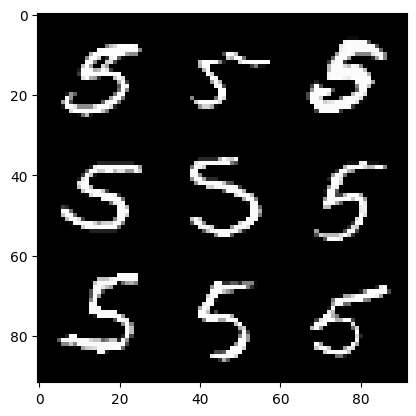

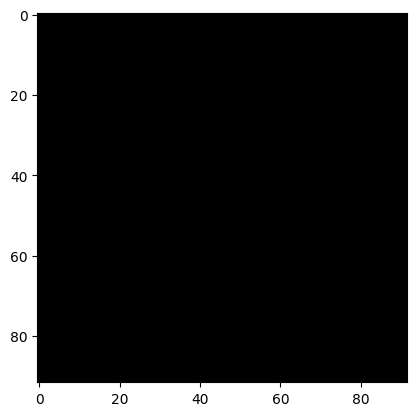

9 : step 54, Generator loss : 0.6425728003184, Discriminator Loss : 0.533468375603358
starting epoch 10


  0%|          | 0/6 [00:00<?, ?it/s]

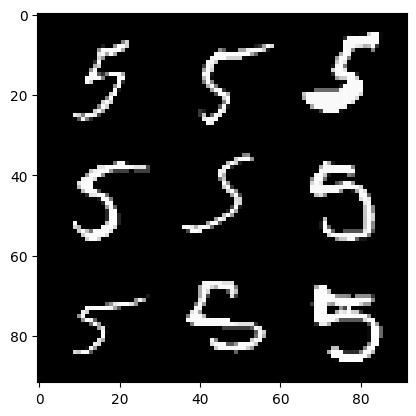

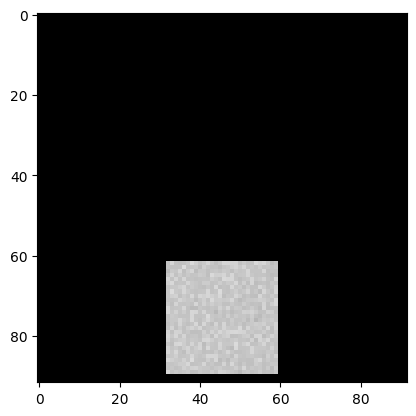

10 : step 60, Generator loss : 0.669643799463908, Discriminator Loss : 0.5171354413032532
starting epoch 11


  0%|          | 0/6 [00:00<?, ?it/s]

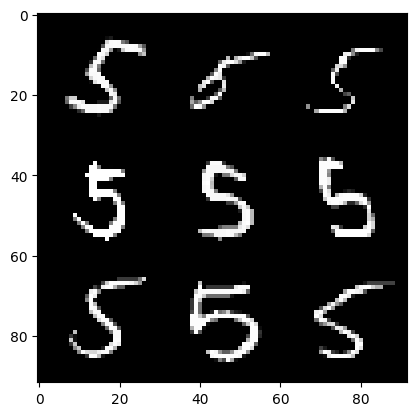

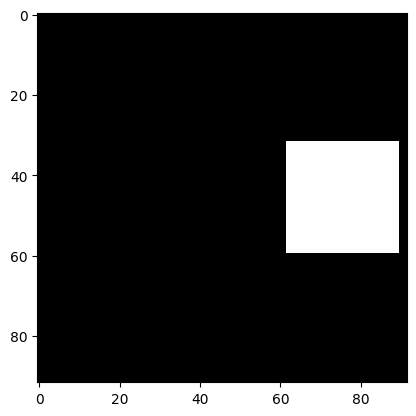

11 : step 66, Generator loss : 0.6833248635133108, Discriminator Loss : 0.5090326070785522
starting epoch 12


  0%|          | 0/6 [00:00<?, ?it/s]

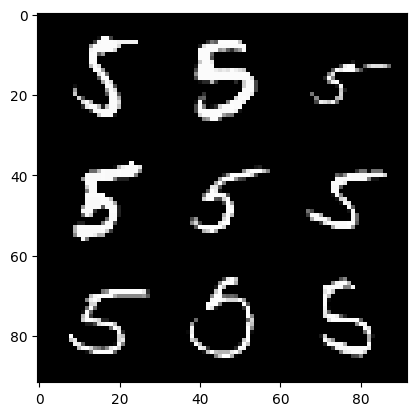

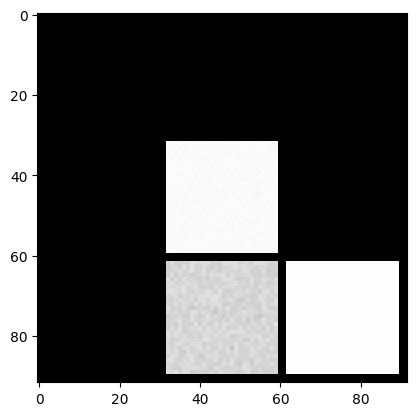

12 : step 72, Generator loss : 0.6887830396493276, Discriminator Loss : 0.5056698421637218
starting epoch 13


  0%|          | 0/6 [00:00<?, ?it/s]

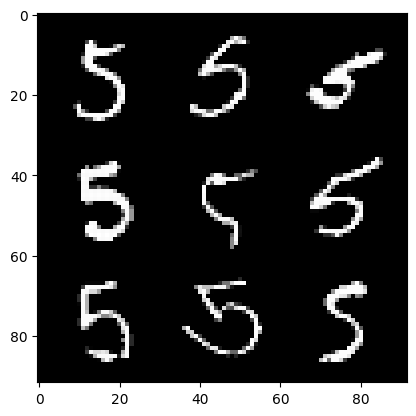

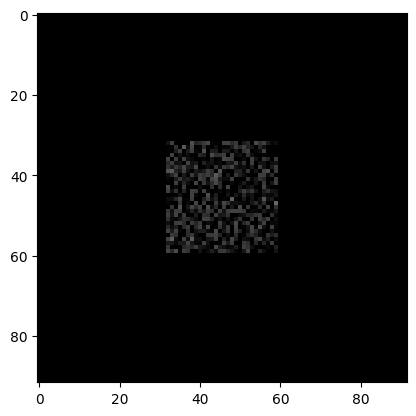

13 : step 78, Generator loss : 0.6908741891384125, Discriminator Loss : 0.504440188407898
starting epoch 14


  0%|          | 0/6 [00:00<?, ?it/s]

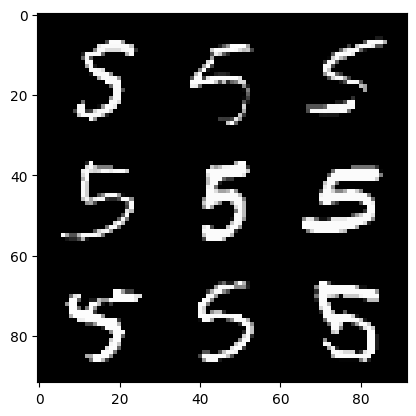

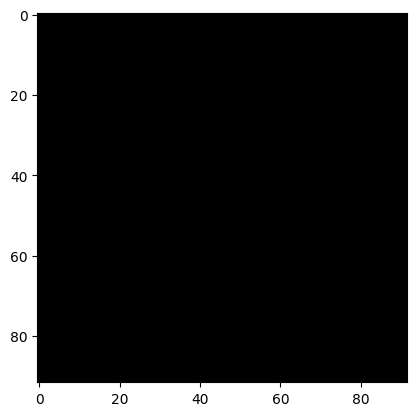

14 : step 84, Generator loss : 0.69173131386439, Discriminator Loss : 0.5039572517077128
starting epoch 15


  0%|          | 0/6 [00:00<?, ?it/s]

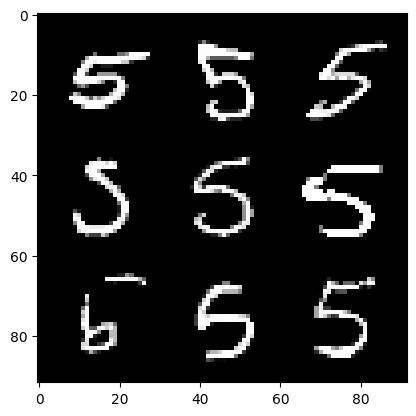

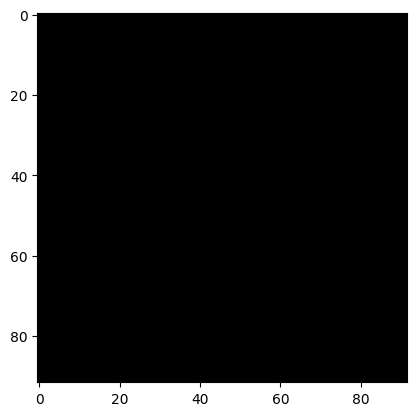

15 : step 90, Generator loss : 0.6921619971593221, Discriminator Loss : 0.5037353734175364
starting epoch 16


  0%|          | 0/6 [00:00<?, ?it/s]

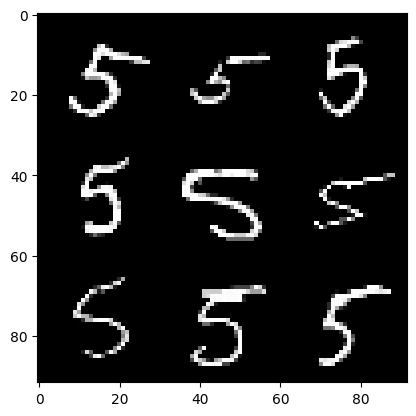

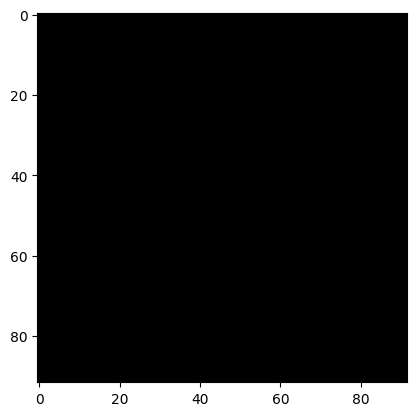

16 : step 96, Generator loss : 0.692362238963445, Discriminator Loss : 0.5035956104596456
starting epoch 17


  0%|          | 0/6 [00:00<?, ?it/s]

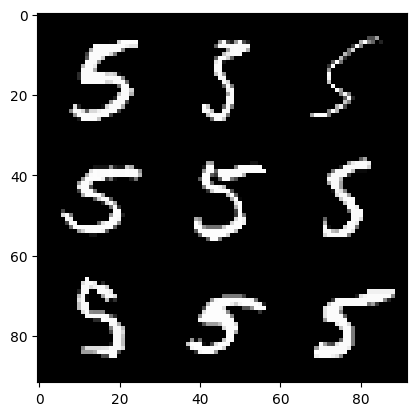

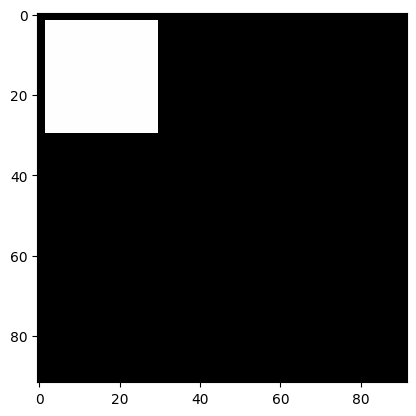

17 : step 102, Generator loss : 0.6925043265024822, Discriminator Loss : 0.5035360753536224
starting epoch 18


  0%|          | 0/6 [00:00<?, ?it/s]

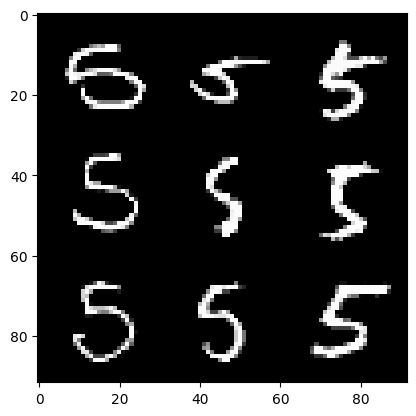

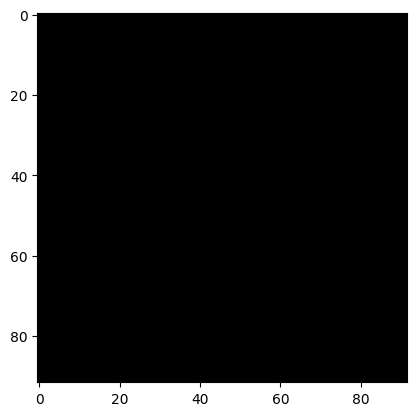

18 : step 108, Generator loss : 0.6925751467545828, Discriminator Loss : 0.5034872889518739
starting epoch 19


  0%|          | 0/6 [00:00<?, ?it/s]

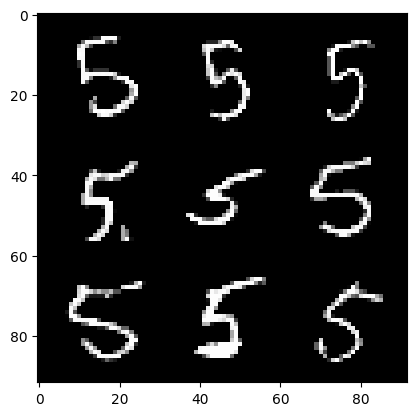

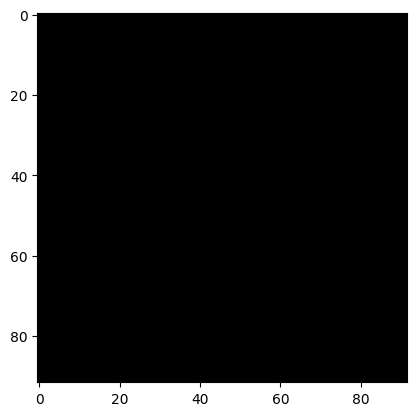

19 : step 114, Generator loss : 0.6926534275213877, Discriminator Loss : 0.5034542282422383
starting epoch 20


  0%|          | 0/6 [00:00<?, ?it/s]

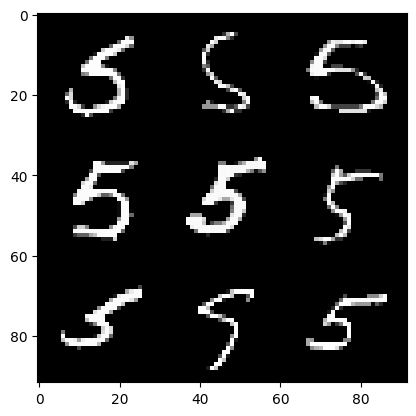

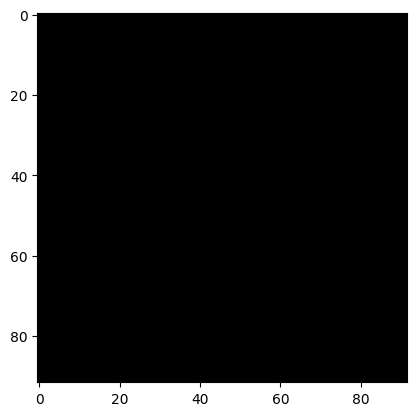

20 : step 120, Generator loss : 0.6926847894986471, Discriminator Loss : 0.503431628147761
starting epoch 21


  0%|          | 0/6 [00:00<?, ?it/s]

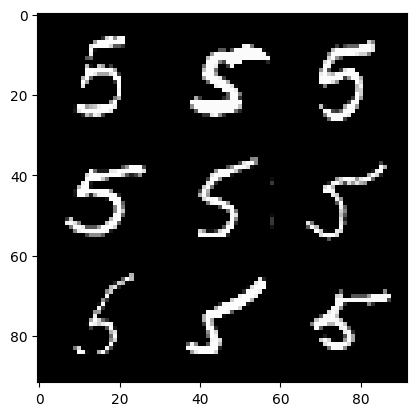

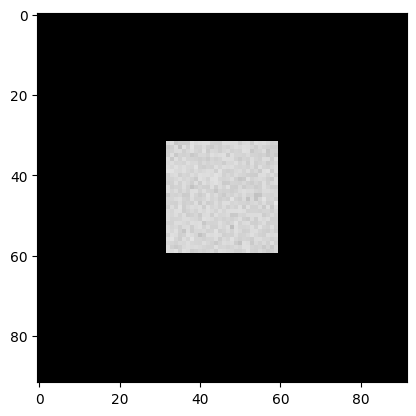

21 : step 126, Generator loss : 0.6927421987056732, Discriminator Loss : 0.5034143229325613
starting epoch 22


  0%|          | 0/6 [00:00<?, ?it/s]

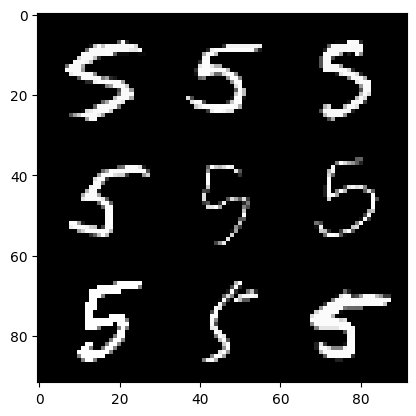

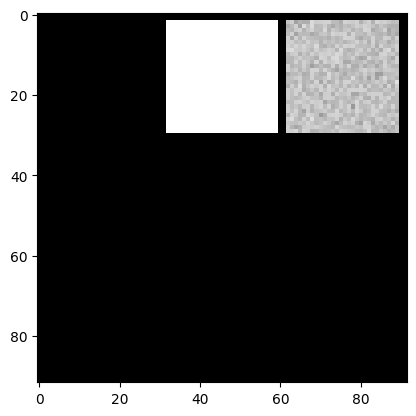

22 : step 132, Generator loss : 0.6927592356999716, Discriminator Loss : 0.5033922890822092
starting epoch 23


  0%|          | 0/6 [00:00<?, ?it/s]

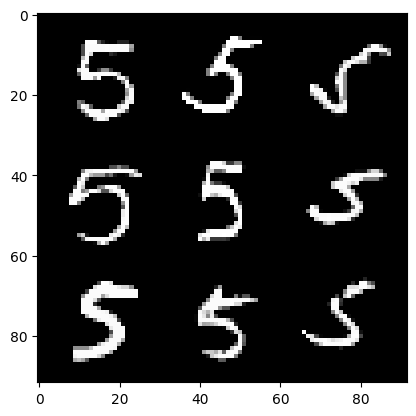

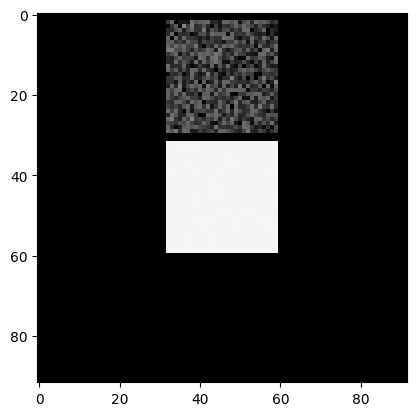

23 : step 138, Generator loss : 0.6927999158700306, Discriminator Loss : 0.5033881962299347
starting epoch 24


  0%|          | 0/6 [00:00<?, ?it/s]

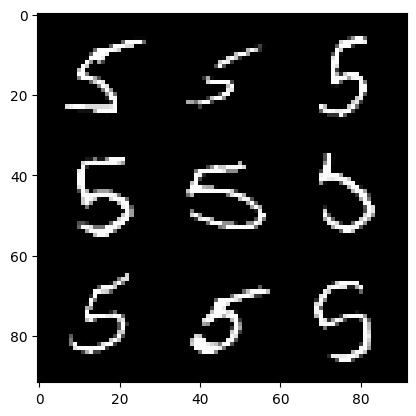

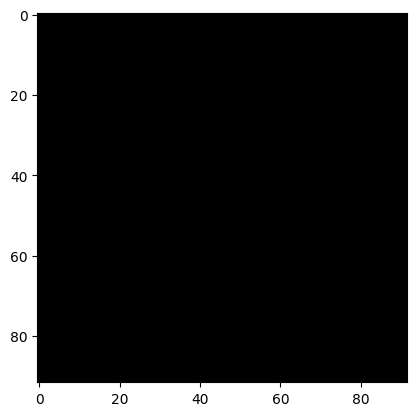

24 : step 144, Generator loss : 0.6928124825159709, Discriminator Loss : 0.5033709704875946
starting epoch 25


  0%|          | 0/6 [00:00<?, ?it/s]

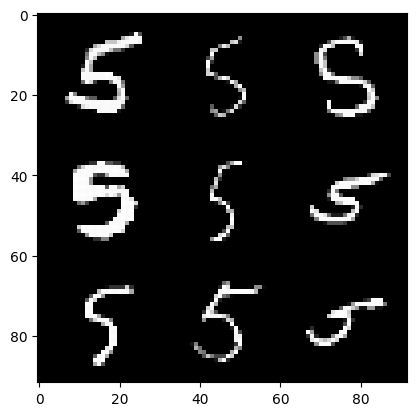

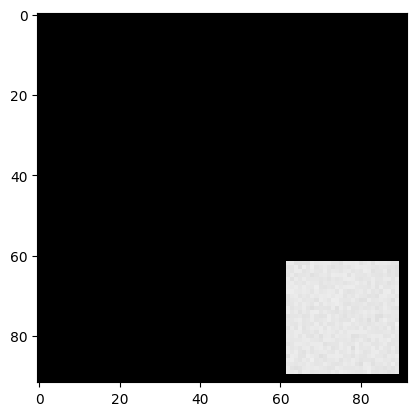

25 : step 150, Generator loss : 0.6928367217381796, Discriminator Loss : 0.5033651789029439
starting epoch 26


  0%|          | 0/6 [00:00<?, ?it/s]

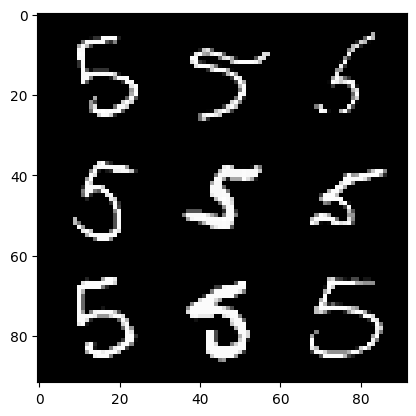

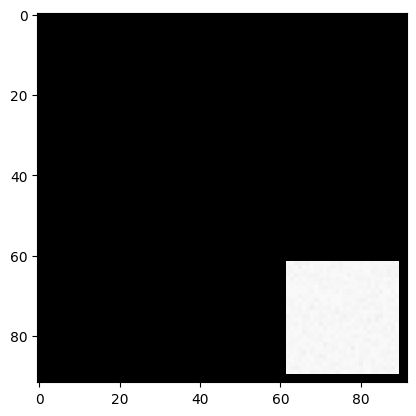

26 : step 156, Generator loss : 0.6928560435771942, Discriminator Loss : 0.5033539136250814
starting epoch 27


  0%|          | 0/6 [00:00<?, ?it/s]

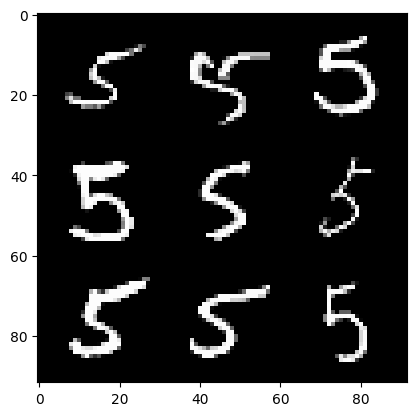

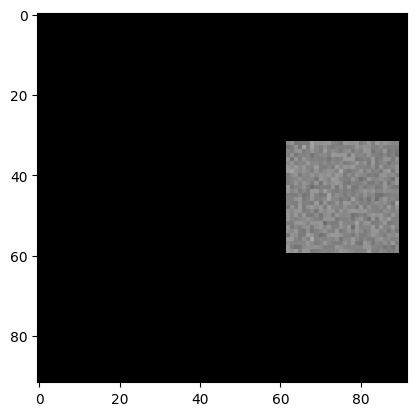

27 : step 162, Generator loss : 0.6928692062695821, Discriminator Loss : 0.5033408403396606
starting epoch 28


  0%|          | 0/6 [00:00<?, ?it/s]

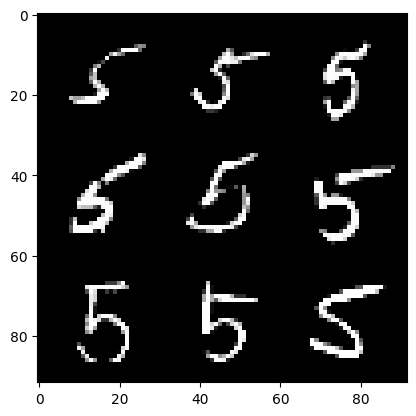

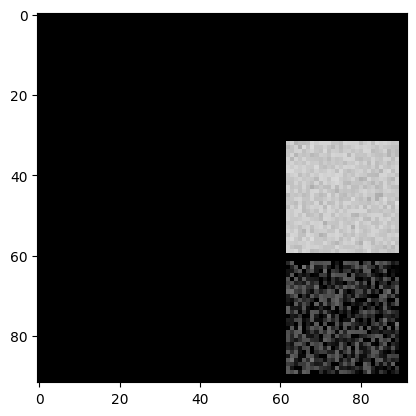

28 : step 168, Generator loss : 0.692891816298167, Discriminator Loss : 0.5033342838287354
starting epoch 29


  0%|          | 0/6 [00:00<?, ?it/s]

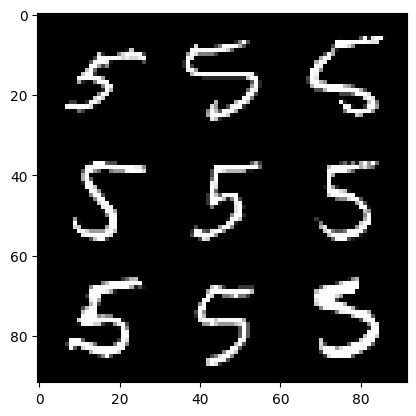

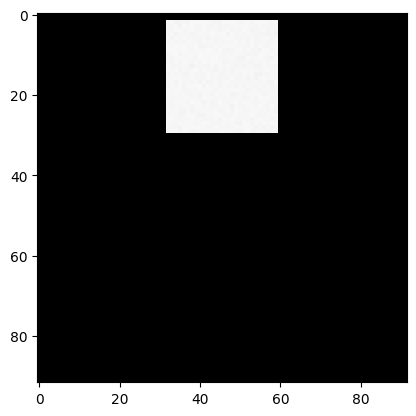

29 : step 174, Generator loss : 0.6929071446259817, Discriminator Loss : 0.5033233165740968
starting epoch 30


  0%|          | 0/6 [00:00<?, ?it/s]

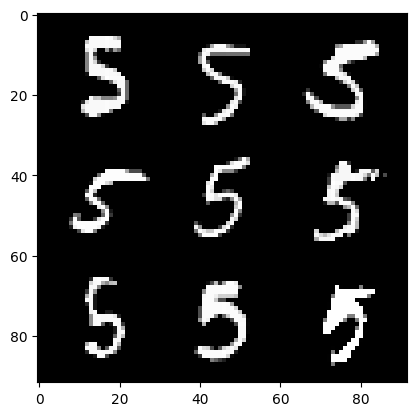

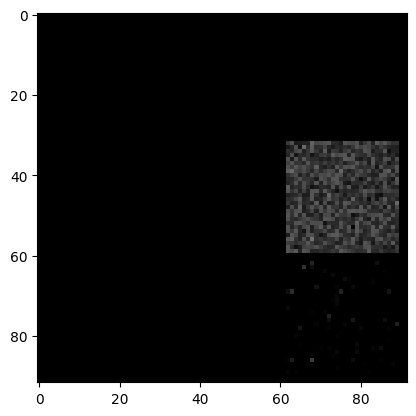

30 : step 180, Generator loss : 0.6929135918617249, Discriminator Loss : 0.5033161342144012
starting epoch 31


  0%|          | 0/6 [00:00<?, ?it/s]

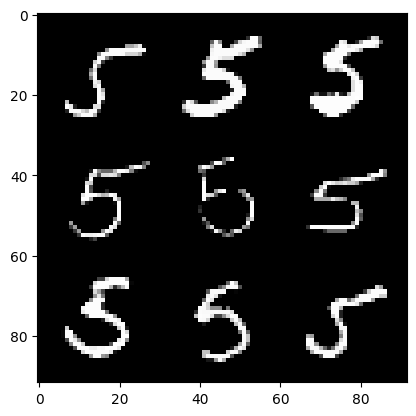

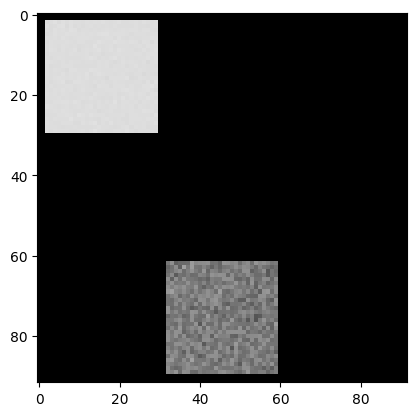

31 : step 186, Generator loss : 0.6929242014884949, Discriminator Loss : 0.5033126274744669
starting epoch 32


  0%|          | 0/6 [00:00<?, ?it/s]

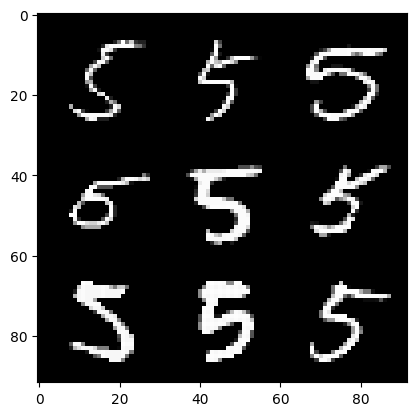

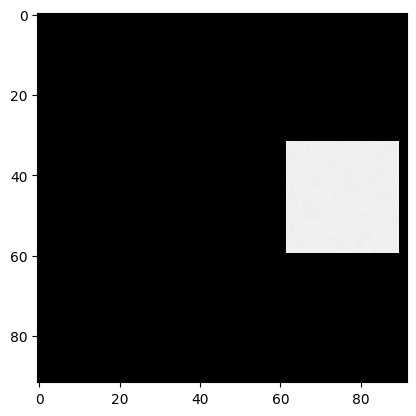

32 : step 192, Generator loss : 0.6929373741149902, Discriminator Loss : 0.5033080875873566
starting epoch 33


  0%|          | 0/6 [00:00<?, ?it/s]

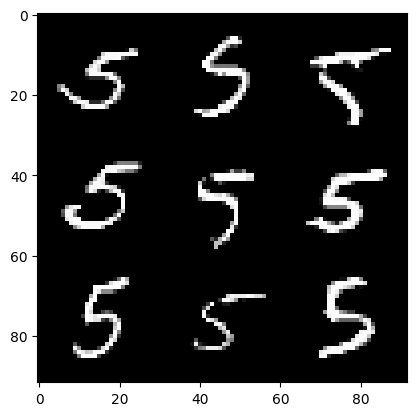

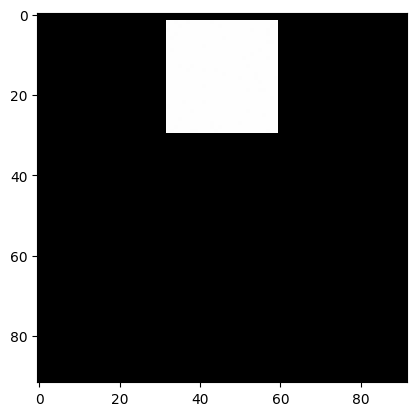

33 : step 198, Generator loss : 0.692953755458196, Discriminator Loss : 0.5033011237780253
starting epoch 34


  0%|          | 0/6 [00:00<?, ?it/s]

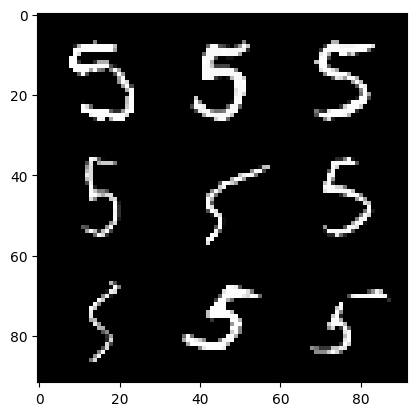

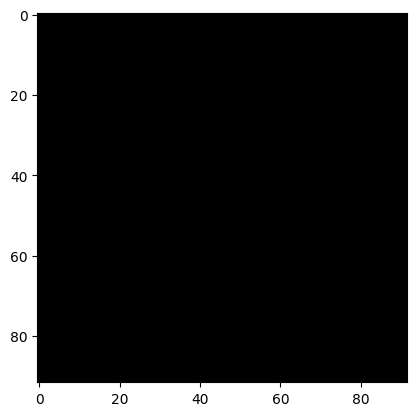

34 : step 204, Generator loss : 0.6929573118686676, Discriminator Loss : 0.5032993753751118
starting epoch 35


  0%|          | 0/6 [00:00<?, ?it/s]

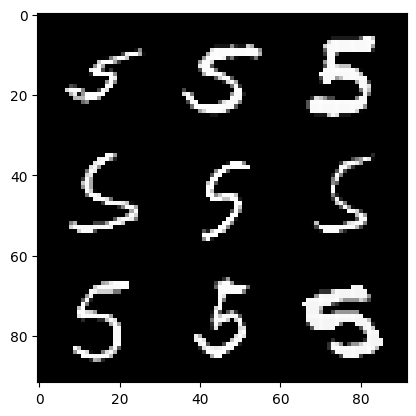

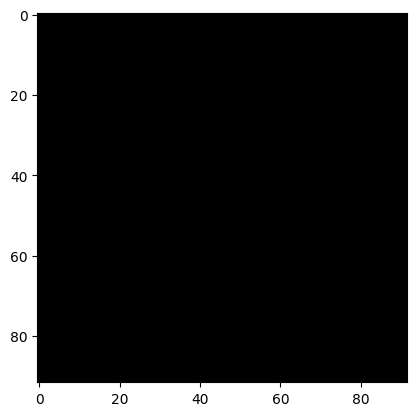

35 : step 210, Generator loss : 0.6929723719755809, Discriminator Loss : 0.5032964746157328
starting epoch 36


  0%|          | 0/6 [00:00<?, ?it/s]

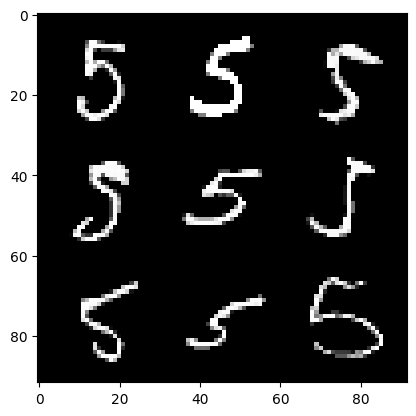

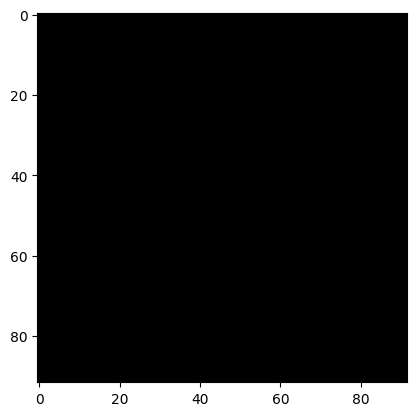

36 : step 216, Generator loss : 0.6929725408554077, Discriminator Loss : 0.5032905638217926
starting epoch 37


  0%|          | 0/6 [00:00<?, ?it/s]

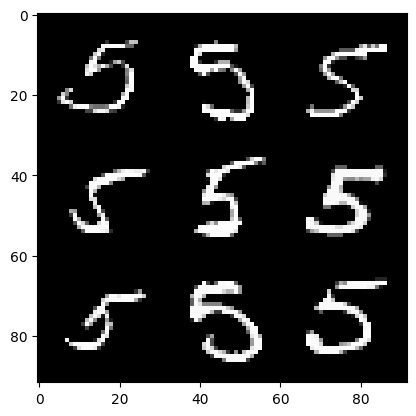

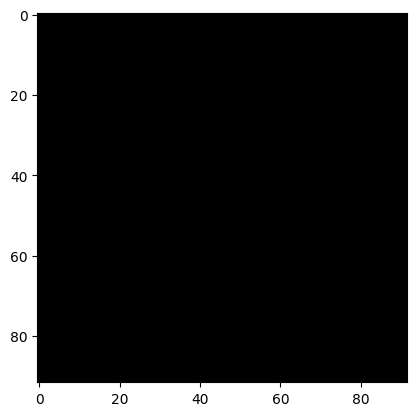

37 : step 222, Generator loss : 0.6929828921953837, Discriminator Loss : 0.5032883584499359


KeyboardInterrupt: 

In [88]:
for epoch in range(epoch):
    mean_disc_loss_list = []
    mean_gen_loss_list = []
    iters_list = []

    for real_image, _ in tqdm(dataloader):
        disc_opt.zero_grad()
        cur_batch_size = len(real_image)
        real_image = real_image.view(cur_batch_size, -1).to(device)
        disc_losses = disc_loss(loss, gen, disc, cur_batch_size, z_dim, real_image)
        disc_losses.backward()
        disc_opt.step()

        gen_opt.zero_grad()
        gen_losses = gen_loss(loss, gen, disc, cur_batch_size, z_dim)
        gen_losses.backward()
        gen_opt.step()


        mean_disc_loss += disc_losses.item() / info_iter
        mean_gen_loss += gen_losses.item() / info_iter
        mean_disc_loss_list.append(mean_disc_loss)
        mean_gen_loss_list.append(mean_gen_loss)

        if cur_iter % info_iter == 0 and cur_iter > 0:
            fake_noise = gen_noise(cur_batch_size, z_dim)
            fake = gen(fake_noise)
            show(real_image)
            show(fake)
            print(f"{epoch} : step {cur_iter}, Generator loss : {mean_gen_loss}, Discriminator Loss : {mean_disc_loss}")
            mean_gen_loss, mean_disc_loss = 0, 0

        iters_list.append(cur_iter)
        cur_iter += 1

In [21]:
print(len(dataset))

5421
